lgbm

# 1 Importação das bibliotecas e dataset

In [ ]:
#from google.colab import drive

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import io

In [ ]:
rotulos = [2 ,  22 ,  37 ,  52 ,  71 ,  99 ,  195 ,  236 ,  300 ,  423 ]
nomes = ['2 FNU',  '22 FNU',  '37 FNU',  '52 FNU',  '71 FNU',  '99 FNU',  '195 FNU',  '236 FNU',  '300 FNU',  '423 FNU']  # Lista para armazenar os nomes das imagens

In [ ]:
# Carregue suas 10 imagens (substitua 'image1.jpg', 'image2.jpg', etc., pelos nomes de seus arquivos)
url="/content/drive/MyDrive/Colab Notebooks/Turbidez/Pos/dataset2-raw"

imagens = []
for i in rotulos:
    imagem = cv2.imread(f'{url}/{str(i).zfill(3)}-3.JPG')
    if imagem is not None:
        imagens.append(imagem)
    else:
      print(f'erro ao ler imagem indice {i}')

# 2 Crop do feixe para o primeiro grafico

In [ ]:
img_crop = []
for imagem in imagens:
  altura, largura, canais = imagem.shape
  largura_faixa = 0.2
  meio = largura // 2
  corte_esquerda = int(meio - (largura * largura_faixa / 2))
  corte_direita = int(meio + (largura * largura_faixa / 2))
  img_crop.append(imagem[:, corte_esquerda:corte_direita+1,2])

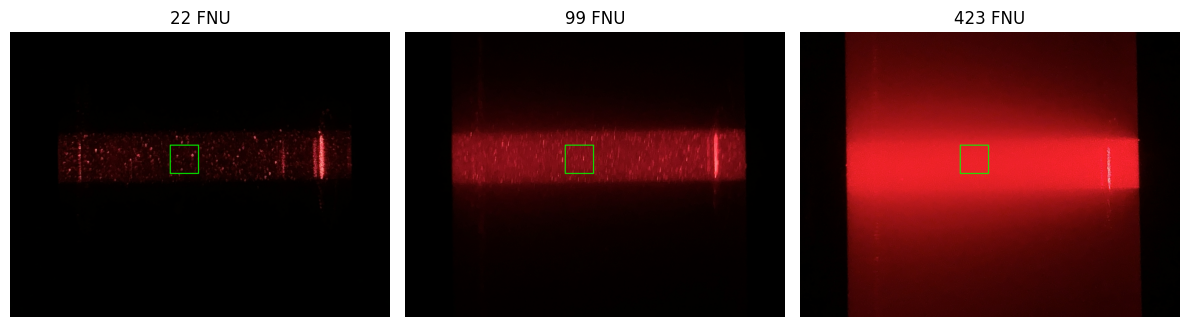

In [ ]:
qtd_img = len(imagens)

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
ax = axes.ravel()
for idx, img in enumerate([1,5,9]):
  imagem = cv2.cvtColor(imagens[img], cv2.COLOR_BGR2RGB)
  imagem_anotada = imagem.copy()

  #x,y,w,h
  #points = []
  #points.append([1500,1200,100,100])
  #points.append([1900,1200,100,100])
  #points.append([2400,1200,100,100])

  #for point in points:
    #cv2.rectangle(imagem_anotada, (point[0],point[1]), (point[0]+point[2], point[1]+point[3]), (0, 255, 0), 10)


  w = 300
  h = 300
  x = 1700
  y = 1200
  #y = 900

  cv2.rectangle(imagem_anotada, (x,y), (x+w, y+h), (0, 255, 0), 10)
  ax[idx].imshow(imagem_anotada)
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[idx].set_title(nomes[img])
  ax[idx].axis('off')

fig.tight_layout()
plt.show()

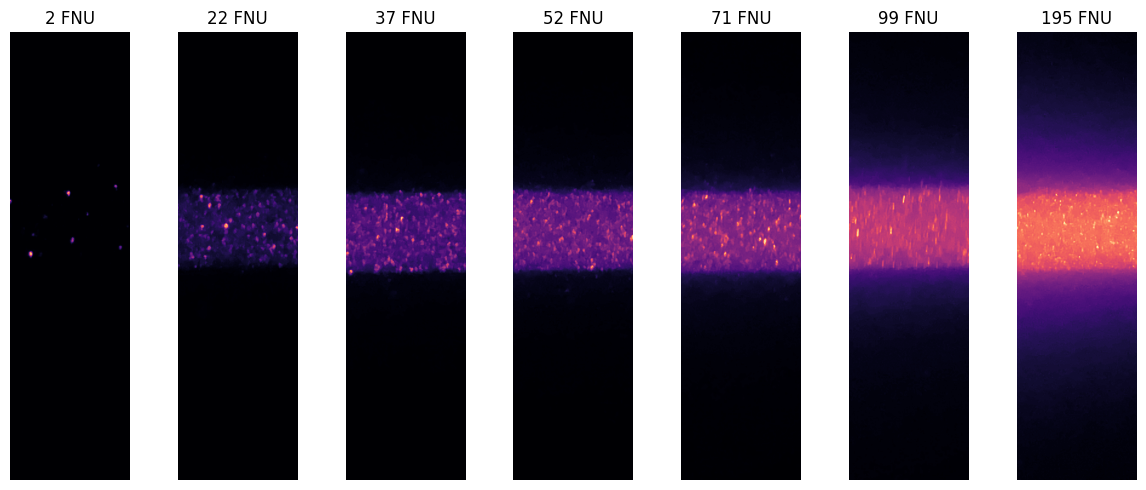

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(12, 5))
ax = axes.ravel()
for x in range(7):
  ax[x].imshow(img_crop[x], cmap='magma')
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[x].set_title(nomes[x])
  ax[x].axis('off')

fig.tight_layout()
plt.show()

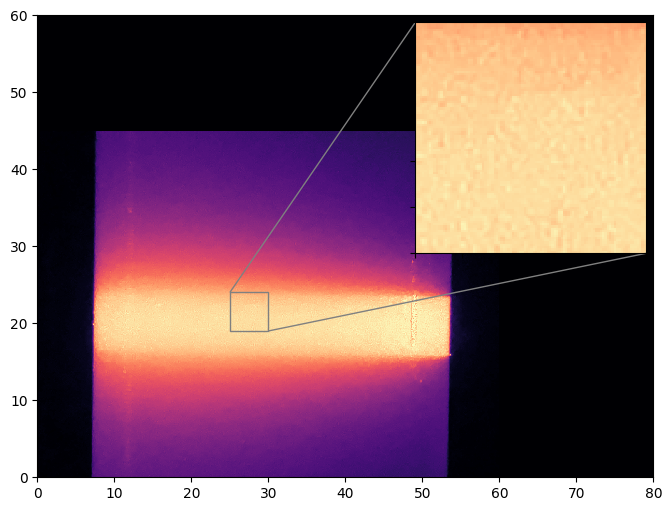

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

gray  = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Turbidez/Pos/dataset2-raw/423-1.JPG')[:,:,2]
fig, ax = plt.subplots(figsize=[8,6])

Z = cv2.resize(gray, (1200, 900), interpolation = cv2.INTER_NEAREST)
Z2 = np.zeros([1200, 1600], dtype="d")
ny, nx = Z.shape
Z2[0:ny, 0:nx] = Z


extent = [0, 80, 0, 60]
ax.imshow(Z2, extent=extent, interpolation="nearest",
          origin="lower", cmap='magma')

axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
axins.imshow(Z2, extent=extent, interpolation="nearest",
             origin="lower", cmap='magma')

# sub region of the original image
x1, x2, y1, y2 = 25.0, 30.0, 19.0, 24.0
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()

# 3 Crop para o primeiro ponto de intensidade

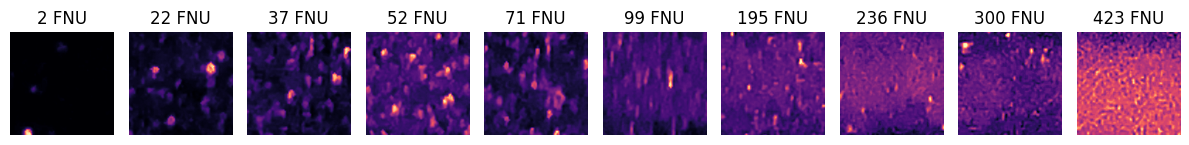

In [ ]:

w = 300
h = 300
x = 1700
y = 1200

img_cropped = []
for imagem in imagens:
  img_cropped.append(imagem[y:y+h, x:x+w][:,:,2])


fig, axes = plt.subplots(1, 10, figsize=(12, 5))
ax = axes.ravel()
for idx, img in enumerate(img_cropped):
  ax[idx].imshow(img_cropped[idx], cmap='magma')
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[idx].set_title(nomes[idx])
  ax[idx].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
intensidade_media =[]

for img in img_cropped:
  intensidade_media.append(np.mean(img))

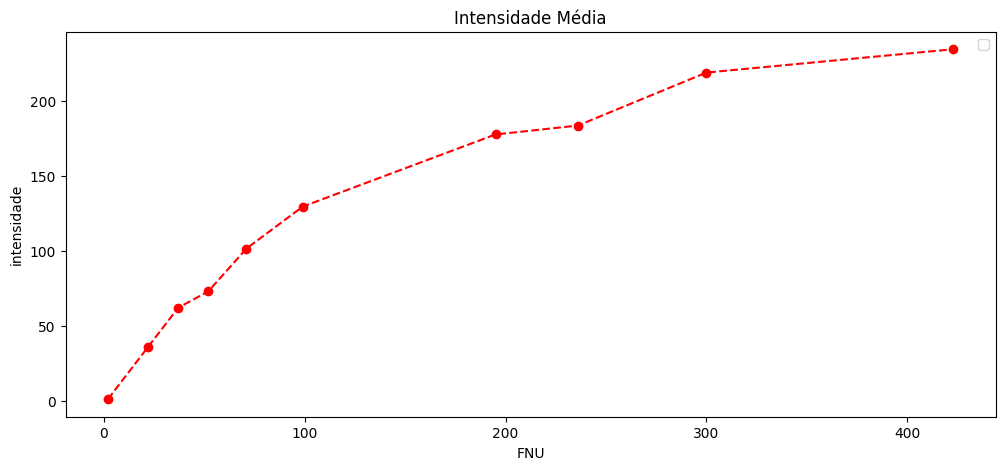

In [ ]:
# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(12, 5))

# Plotar os dados com as personalizações
ax.plot(rotulos, intensidade_media, color='red', linestyle='--', marker='o')

# Adicionar rótulos e título
ax.set_xlabel('FNU')
ax.set_ylabel('intensidade')
ax.set_title('Intensidade Média')

# Incluir uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()

# Teste 2

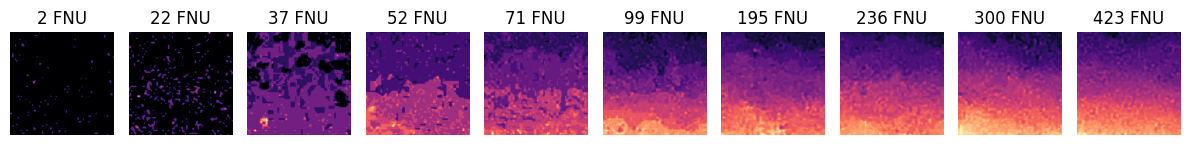

In [ ]:

w = 300
h = 300
x = 1700
#y = 1200
y = 500

img_cropped2 = []
for imagem in imagens:
  img_cropped2.append(imagem[y:y+h, x:x+w][:,:,2])


fig, axes = plt.subplots(1, 10, figsize=(12, 5))
ax = axes.ravel()
for idx, img in enumerate(img_cropped2):
  ax[idx].imshow(img_cropped2[idx], cmap='magma')
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[idx].set_title(nomes[idx])
  ax[idx].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
intensidade_media2 =[]
variancia =[]

for img in img_cropped2:
  intensidade_media2.append(np.mean(img))

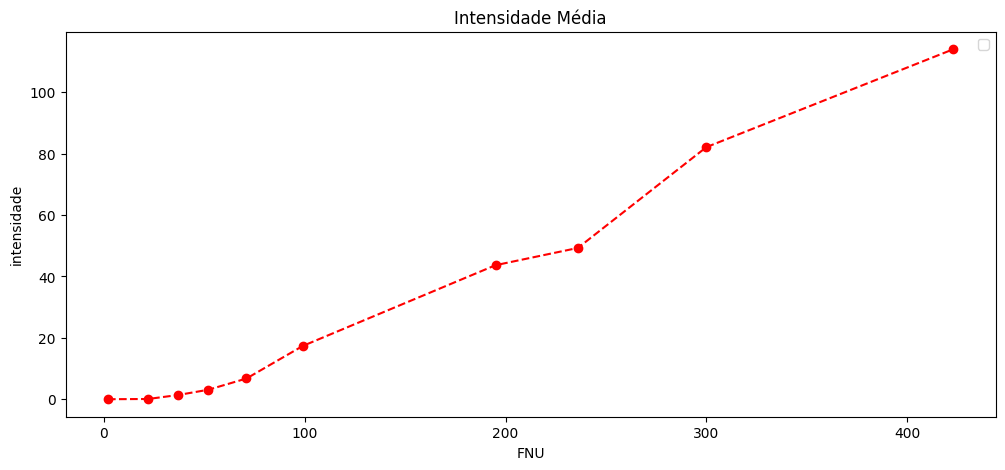

In [ ]:
# Criar uma figura e um eixo
fig, ax = plt.subplots(figsize=(12, 5))

# Plotar os dados com as personalizações
ax.plot(rotulos, intensidade_media2, color='red', linestyle='--', marker='o')

# Adicionar rótulos e título
ax.set_xlabel('FNU')
ax.set_ylabel('intensidade')
ax.set_title('Intensidade Média')

# Incluir uma legenda
ax.legend()

# Mostrar o gráfico
plt.show()

In [ ]:
# Lista para armazenar os histogramas
histogramas = []


for imagem in img_cropped:
  histograma = cv2.calcHist([imagem], [0], None, [256], [0, 256])
  histogramas.append(histograma)


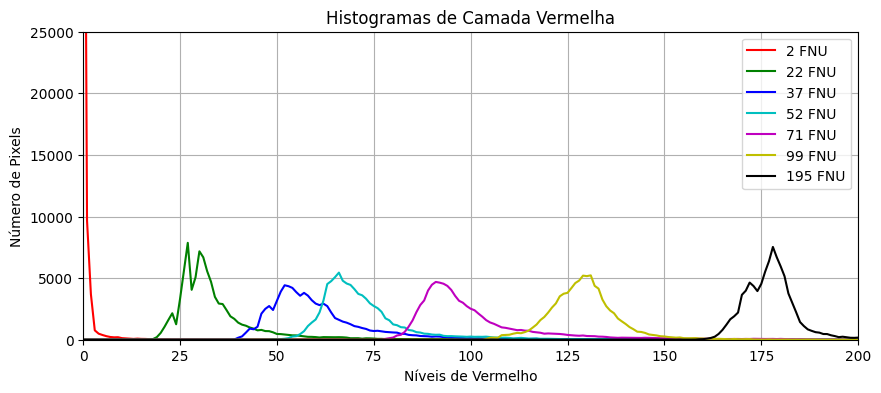

In [ ]:
# Cores para os histogramas
cores = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Crie uma figura para exibir os histogramas em um único gráfico com cores diferentes
plt.figure(figsize=(10, 4))
for i in range(7):
  plt.plot(histogramas[i], color=cores[i], label=nomes[i])

plt.title('Histogramas de Camada Vermelha')
plt.xlabel('Níveis de Vermelho')
plt.ylabel('Número de Pixels')
plt.xlim([0, 200])
plt.ylim([0,25000])
plt.grid(True)
plt.legend()
plt.show()

# Treino da regressão

Métricas de Avaliação para Modelo Polinomial:
MSA (Erro Médio Absoluto): 9.629346842413646
MSE (Erro Quadrático Médio): 214.71780271646307
R2 Score (Coeficiente de Determinação): 0.9877692770164943

Métricas de Avaliação para Modelo Linear:
MSA (Erro Médio Absoluto): 34.139975368037504
MSE (Erro Quadrático Médio): 1923.4329281935509
R2 Score (Coeficiente de Determinação): 0.8904377046315365


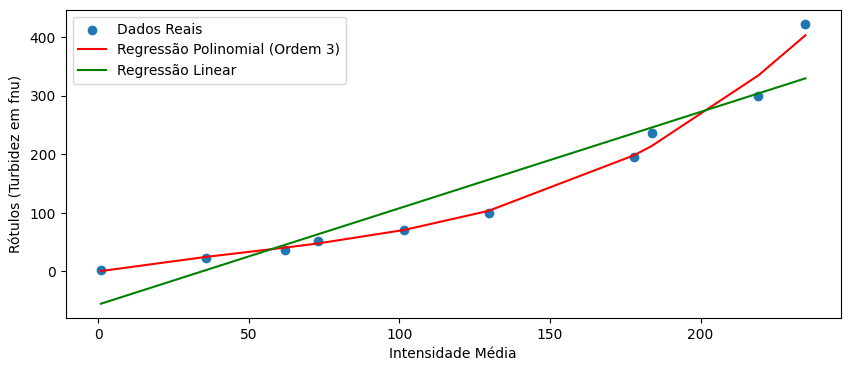

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dados de entrada
X = np.array(intensidade_media)
Y = np.array(rotulos)

# Criar um modelo de regressão polinomial de ordem 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))

model_poly = LinearRegression()
model_poly.fit(X_poly, Y)

# Fazer previsões com o modelo polinomial
y_pred_poly = model_poly.predict(X_poly)

# Calcular métricas de avaliação para o modelo polinomial
mse_poly = mean_squared_error(Y, y_pred_poly)
msa_poly = mean_absolute_error(Y, y_pred_poly)
r2_poly = r2_score(Y, y_pred_poly)

# Criar um modelo de regressão linear
model_linear = LinearRegression()
model_linear.fit(X.reshape(-1, 1), Y)

# Fazer previsões com o modelo linear
y_pred_linear = model_linear.predict(X.reshape(-1, 1))

# Calcular métricas de avaliação para o modelo linear
mse_linear = mean_squared_error(Y, y_pred_linear)
msa_linear = mean_absolute_error(Y, y_pred_linear)
r2_linear = r2_score(Y, y_pred_linear)

# Imprimir as métricas de avaliação
print("Métricas de Avaliação para Modelo Polinomial:")
print(f'MSA (Erro Médio Absoluto): {msa_poly}')
print(f'MSE (Erro Quadrático Médio): {mse_poly}')
print(f'R2 Score (Coeficiente de Determinação): {r2_poly}')

print("\nMétricas de Avaliação para Modelo Linear:")
print(f'MSA (Erro Médio Absoluto): {msa_linear}')
print(f'MSE (Erro Quadrático Médio): {mse_linear}')
print(f'R2 Score (Coeficiente de Determinação): {r2_linear}')

# Plotar os resultados
plt.figure(figsize=(10, 4))
plt.scatter(intensidade_media, rotulos, label='Dados Reais')
plt.plot(X, y_pred_poly, color='red', label='Regressão Polinomial (Ordem 3)')
plt.plot(X, y_pred_linear, color='green', label='Regressão Linear')
plt.xlabel('Intensidade Média')
plt.ylabel('Rótulos (Turbidez em fnu)')
plt.legend()
plt.show()


# Novo Teste


In [ ]:
imagens[0].shape

(3024, 4032, 3)

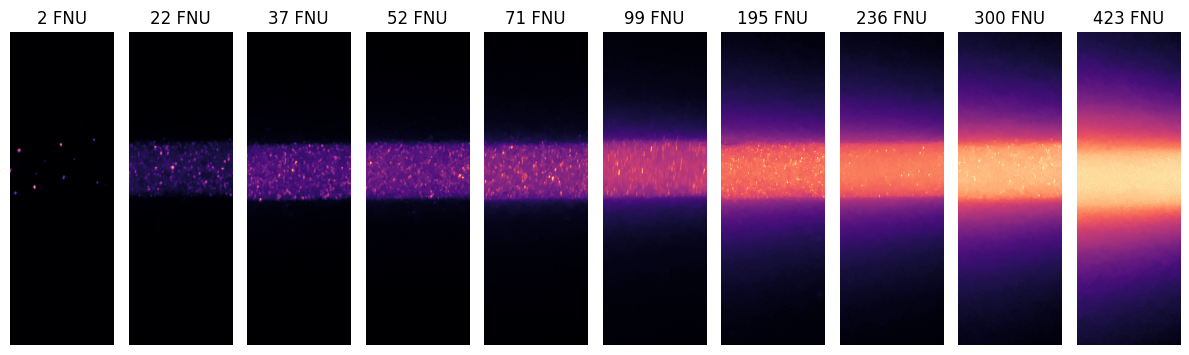

In [ ]:

w = 1000
h = 3024
x = 1516
y = 0

img_dispersao = []
for imagem in imagens:
  img_dispersao.append(imagem[y:y+h, x:x+w][:,:,2])


fig, axes = plt.subplots(1, 10, figsize=(12, 5))
ax = axes.ravel()
for idx, img in enumerate(img_dispersao):
  ax[idx].imshow(img_dispersao[idx], cmap='magma')
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[idx].set_title(nomes[idx])
  ax[idx].axis('off')

fig.tight_layout()
plt.show()

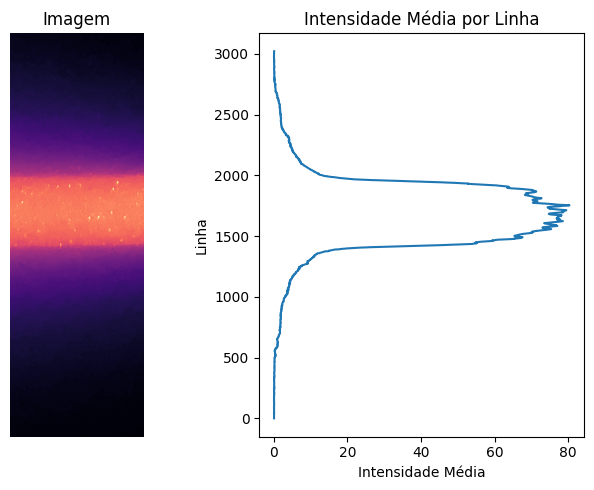

In [ ]:
vetor_plot = np.mean(img_dispersao[3], axis=1)

# Criar uma figura com duas subtramas (uma linha, duas colunas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5))

# Plotar a imagem na primeira subtrama
ax1.imshow(img_dispersao[7], cmap='magma')
ax1.set_title('Imagem')

# Plotar o gráfico de intensidade média na segunda subtrama
ax2.plot(vetor_plot, range(img_dispersao[7].shape[0])[::-1])

ax2.set_title('Intensidade Média por Linha')
ax2.set_xlabel('Intensidade Média')
ax2.set_ylabel('Linha')


ax1.axis('off')
#ax2.axis('off')
# Ajustar o espaço entre as subtramas
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [ ]:
medias = []
for img in img_dispersao:
  medias.append(np.mean(img, axis=1))

In [ ]:
len(medias)

10

In [ ]:
len(medias[0])

3024

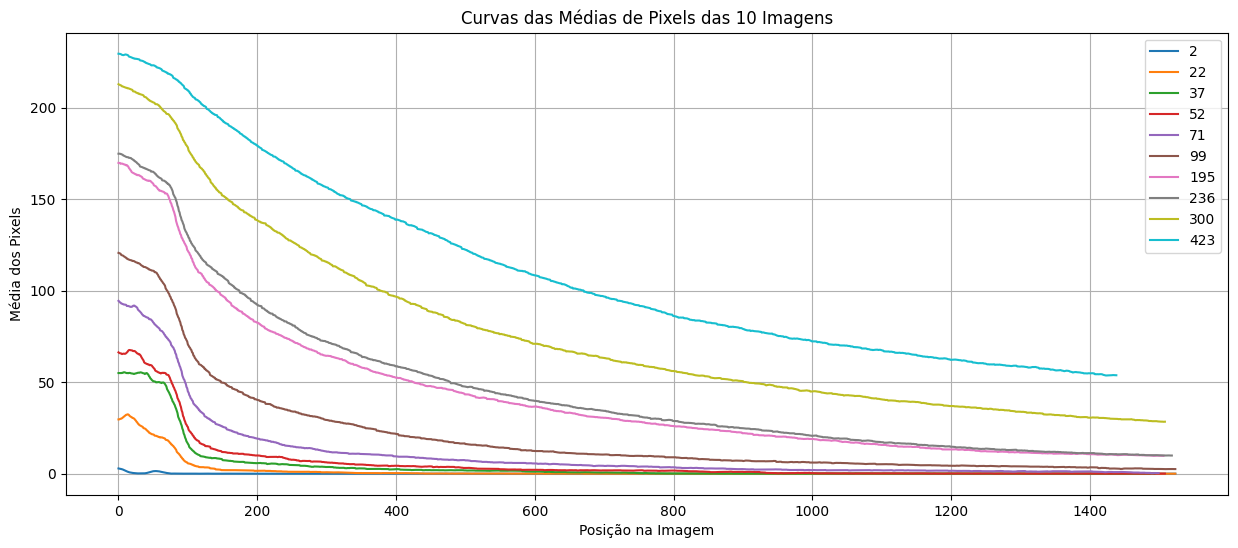

In [ ]:

import scipy.signal

ajuste = [0,0,30,15,24,0,17,5,15,85]

novo_vetor = []
for i in range(len(medias)):
    curva = medias[i][ajuste[i]+1500:]
    #curva_suavizada = scipy.signal.savgol_filter(curva, window_length=50, polyorder=3)
    novo_vetor.append(curva)


plt.figure(figsize=(15, 6))  # Tamanho do gráfico
for i in range(len(novo_vetor)):
    plt.plot(novo_vetor[i], label=rotulos[i])

plt.xlabel('Posição na Imagem')
plt.ylabel('Média dos Pixels')
plt.title('Curvas das Médias de Pixels das 10 Imagens')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#medias[i][ajuste[i]+1500:]

retas = []

for idx, media in enumerate(medias):
    pontos = [0,0,0]
    for idx2, x_position in enumerate([200, 400, 600,]):
        x_ponto = ajuste[idx]+1500 + x_position

        pontos[idx2] = np.mean(media[x_ponto:x_ponto+50] )
    retas.append(pontos)





In [ ]:
new_feature = []
for idx, reta in enumerate(retas):
  coe_ang = (reta[2]-reta[0])/400
  new_feature.append([intensidade_media[idx], coe_ang, reta[0]])

new_feature = np.array(new_feature)

In [ ]:
new_feature

array([[ 8.60222222e-01, -6.90000000e-06,  1.53000000e-02],
       [ 3.58511667e+01, -3.35480000e-03,  1.38520000e+00],
       [ 6.19966778e+01, -1.10252500e-02,  5.39440000e+00],
       [ 7.29847889e+01, -1.76652000e-02,  9.06514000e+00],
       [ 1.01576400e+02, -2.94462500e-02,  1.70761800e+01],
       [ 1.29612222e+02, -6.27606000e-02,  3.70550200e+01],
       [ 1.77834700e+02, -1.05941450e-01,  7.73172400e+01],
       [ 1.83784889e+02, -1.20743350e-01,  8.67319600e+01],
       [ 2.19203778e+02, -1.60196400e-01,  1.33080060e+02],
       [ 2.34808267e+02, -1.69575900e-01,  1.73338720e+02]])

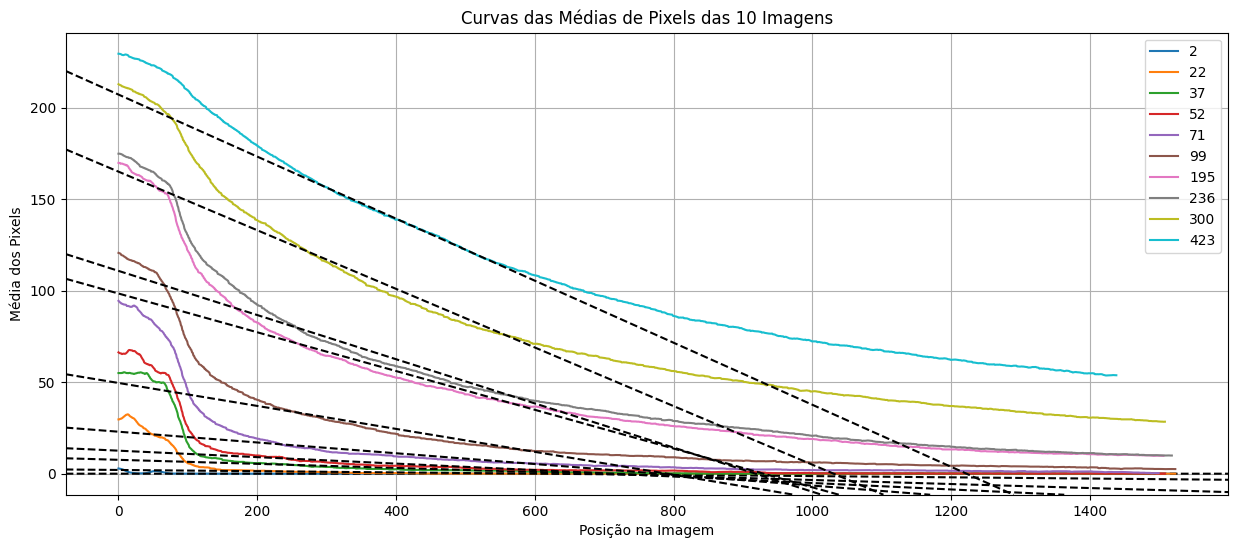

In [ ]:
ajuste = [0,0,30,15,24,0,17,5,15,85]


novo_vetor = []
for i in range(len(medias)):
    curva = medias[i][ajuste[i]+1500:]
    #curva_suavizada = scipy.signal.savgol_filter(curva, window_length=50, polyorder=3)
    novo_vetor.append(curva)


plt.figure(figsize=(15, 6))  # Tamanho do gráfico
for i in range(len(novo_vetor)):
    plt.plot(novo_vetor[i], label=rotulos[i])
    plt.axline((200,new_feature[i][2]) ,slope=new_feature[i][1], color="black", linestyle="--")
    #plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))

plt.xlabel('Posição na Imagem')
plt.ylabel('Média dos Pixels')
plt.title('Curvas das Médias de Pixels das 10 Imagens')
plt.legend()
plt.grid(True)
plt.show()

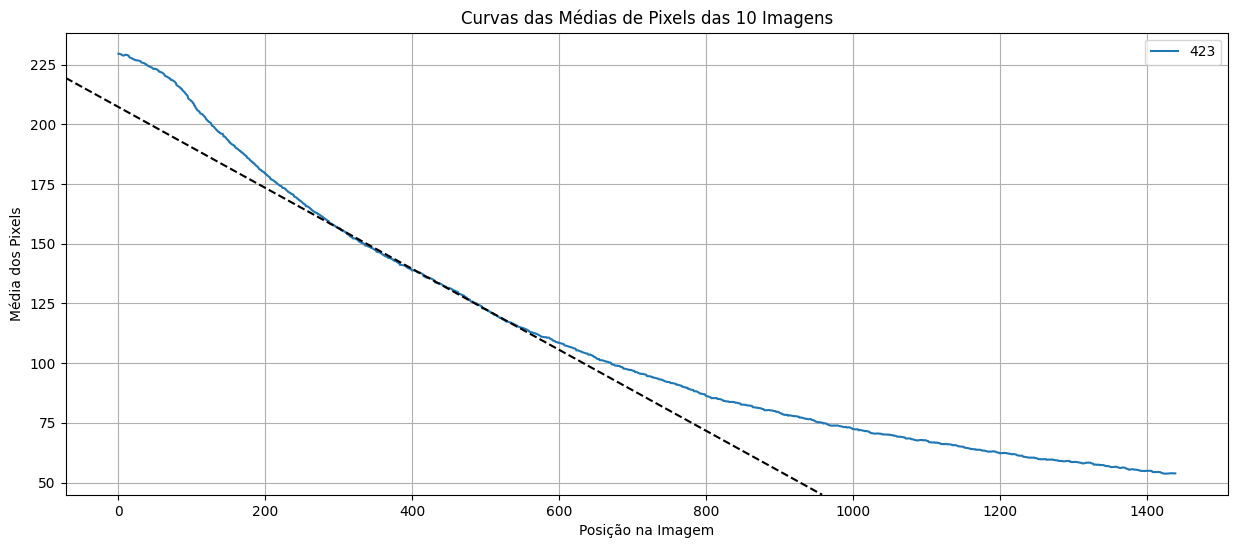

In [ ]:
ajuste = [0,0,30,15,24,0,17,5,15,85]


novo_vetor = []
for i in range(len(medias)):
    curva = medias[i][ajuste[i]+1500:]
    #curva_suavizada = scipy.signal.savgol_filter(curva, window_length=50, polyorder=3)
    novo_vetor.append(curva)


plt.figure(figsize=(15, 6))  # Tamanho do gráfico

plt.plot(novo_vetor[9], label=rotulos[9])
plt.axline((200,new_feature[9][2]) ,slope=new_feature[9][1], color="black", linestyle="--")
    #plt.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))

plt.xlabel('Posição na Imagem')
plt.ylabel('Média dos Pixels')
plt.title('Curvas das Médias de Pixels das 10 Imagens')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
new_feature

array([[ 8.60222222e-01, -6.90000000e-06,  1.53000000e-02],
       [ 3.58511667e+01, -3.35480000e-03,  1.38520000e+00],
       [ 6.19966778e+01, -1.10252500e-02,  5.39440000e+00],
       [ 7.29847889e+01, -1.76652000e-02,  9.06514000e+00],
       [ 1.01576400e+02, -2.94462500e-02,  1.70761800e+01],
       [ 1.29612222e+02, -6.27606000e-02,  3.70550200e+01],
       [ 1.77834700e+02, -1.05941450e-01,  7.73172400e+01],
       [ 1.83784889e+02, -1.20743350e-01,  8.67319600e+01],
       [ 2.19203778e+02, -1.60196400e-01,  1.33080060e+02],
       [ 2.34808267e+02, -1.69575900e-01,  1.73338720e+02]])

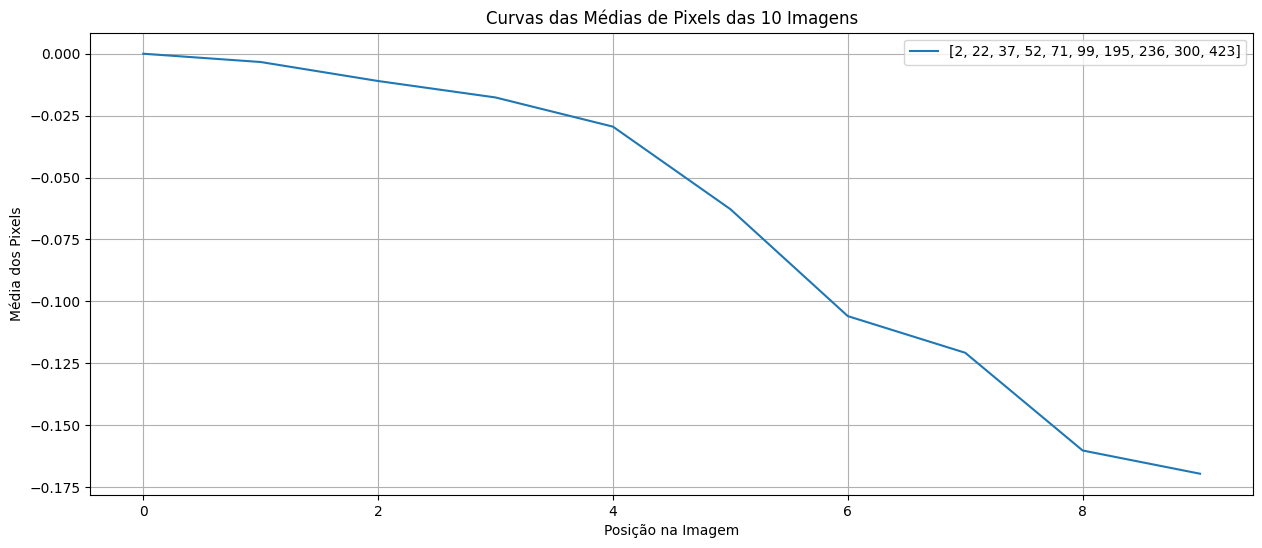

In [ ]:
plt.figure(figsize=(15, 6))


plt.plot(new_feature[:,1], label=rotulos)

plt.xlabel('Posição na Imagem')
plt.ylabel('Média dos Pixels')
plt.title('Curvas das Médias de Pixels das 10 Imagens')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Crie um modelo de regressão linear múltipla
modelo_novo = LinearRegression()

# Treine o modelo com os dados de treinamento
modelo_novo.fit(new_feature, rotulos)

# Calcular métricas de avaliação
previsoes = modelo_novo.predict(new_feature)
msa_linear = mean_absolute_error(rotulos, previsoes)
mse_linear = mean_squared_error(rotulos, previsoes)
r2_linear = r2_score(rotulos, previsoes)


print("\nMétricas de Avaliação para Modelo Linear:")
print(f'MSA (Erro Médio Absoluto): {msa_linear}')
print(f'MSE (Erro Quadrático Médio): {mse_linear}')
print(f'R2 Score (Coeficiente de Determinação): {r2_linear}')


Métricas de Avaliação para Modelo Linear:
MSA (Erro Médio Absoluto): 6.487361382026745
MSE (Erro Quadrático Médio): 92.06049927093372
R2 Score (Coeficiente de Determinação): 0.9947560637727237


In [ ]:
# Carregue suas 10 imagens (substitua 'image1.jpg', 'image2.jpg', etc., pelos nomes de seus arquivos)
url_teste="/content/drive/MyDrive/Colab Notebooks/Turbidez/Pos/dataset2-raw"

imagens_teste = []
for i in rotulos:
    imagem = cv2.imread(f'{url_teste}/{str(i).zfill(3)}-2.JPG')
    if imagem is not None:
        imagens_teste.append(imagem)
    else:
      print(f'erro ao ler imagem indice {i}')

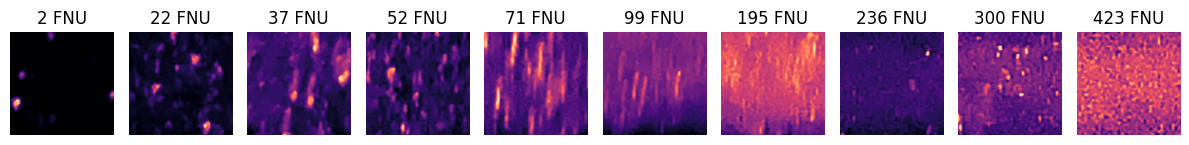

In [ ]:

w = 300
h = 300
x = 1700
y = 1200

img_cropped_teste = []
for imagem in imagens_teste:
  img_cropped_teste.append(imagem[y:y+h, x:x+w][:,:,2])


fig, axes = plt.subplots(1, 10, figsize=(12, 5))
ax = axes.ravel()
for idx, img in enumerate(img_cropped_teste):
  ax[idx].imshow(img_cropped_teste[idx], cmap='magma')
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[idx].set_title(nomes[idx])
  ax[idx].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
intensidade_media_teste =[]

for img in img_cropped_teste:
  intensidade_media_teste.append(np.mean(img))

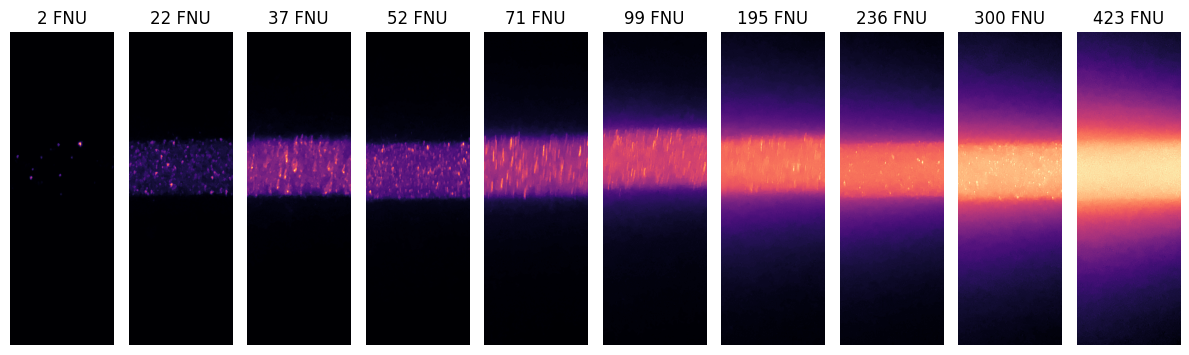

In [ ]:
w = 1000
h = 3024
x = 1516
y = 0

img_dispersao_teste = []
for imagem in imagens_teste:
  img_dispersao_teste.append(imagem[y:y+h, x:x+w][:,:,2])


fig, axes = plt.subplots(1, 10, figsize=(12, 5))
ax = axes.ravel()
for idx, img in enumerate(img_dispersao_teste):
  ax[idx].imshow(img_dispersao_teste[idx], cmap='magma')
  #ax[x].imshow(cv2.cvtColor(img_crop[x], cv2.COLOR_BGR2RGB))
  ax[idx].set_title(nomes[idx])
  ax[idx].axis('off')

fig.tight_layout()
plt.show()

In [ ]:
medias_teste = []
for img in img_dispersao_teste:
  medias_teste.append(np.mean(img, axis=1))

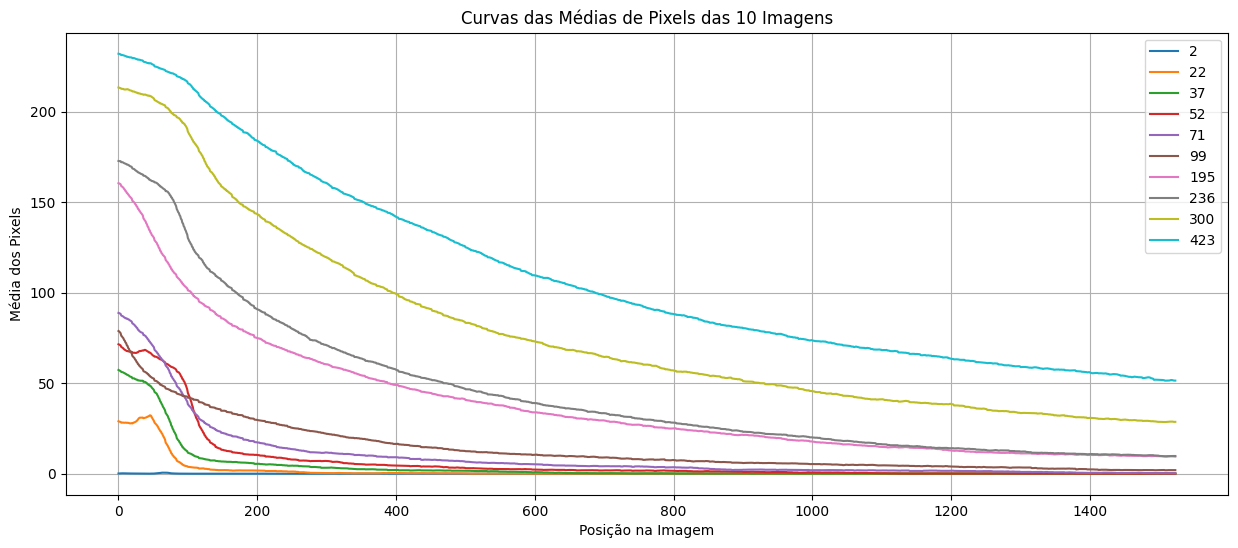

In [ ]:
novo_vetor_teste = []
for i in range(len(medias_teste)):
    curva = medias_teste[i][1500:]
    #curva_suavizada = scipy.signal.savgol_filter(curva, window_length=50, polyorder=3)
    novo_vetor_teste.append(curva)


plt.figure(figsize=(15, 6))  # Tamanho do gráfico
for i in range(len(novo_vetor_teste)):
    plt.plot(novo_vetor_teste[i], label=rotulos[i])

plt.xlabel('Posição na Imagem')
plt.ylabel('Média dos Pixels')
plt.title('Curvas das Médias de Pixels das 10 Imagens')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#medias[i][ajuste[i]+1500:]

retas_teste = []

for idx, media in enumerate(medias_teste):
    pontos = [0,0,0]
    for idx2, x_position in enumerate([200, 400, 600,]):
        x_ponto = ajuste[idx]+1500 + x_position

        pontos[idx2] = np.mean(media[x_ponto:x_ponto+50] )
    retas_teste.append(pontos)

In [ ]:
new_feature_teste = []
for idx, reta in enumerate(retas_teste):
  coe_ang = (reta[2]-reta[0])/400
  new_feature_teste.append([intensidade_media_teste[idx], coe_ang, reta[0]])

new_feature_teste = np.array(new_feature_teste)

# Teste Modelo Novo

In [ ]:
previsoes_teste = modelo_novo.predict(new_feature_teste)

In [ ]:
previsoes_teste

array([  3.28375487,  21.83652147,  39.77403825,  48.44329503,
        69.86378891,  96.45297972, 188.64952169, 207.27400692,
       316.38697834, 396.30877798])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rotulos_verdadeiros = np.array(rotulos)

# Calcular métricas de avaliação
msa = mean_absolute_error(rotulos_verdadeiros, previsoes_teste)
mse = mean_squared_error(rotulos_verdadeiros, previsoes_teste)
r2 = r2_score(rotulos_verdadeiros, previsoes_teste)

# Imprimir métricas
print("\nMétricas de Avaliação para as Previsões:")
print(f'MSA (Erro Médio Absoluto): {msa}')
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R2 Score (Coeficiente de Determinação): {r2}')


Métricas de Avaliação para as Previsões:
MSA (Erro Médio Absoluto): 8.961587973358153
MSE (Erro Quadrático Médio): 187.62641236239583
R2 Score (Coeficiente de Determinação): 0.9893124526939027


In [ ]:
X_teste = np.array(intensidade_media_teste)
X_poly_teste = poly_features.fit_transform(X_teste.reshape(-1, 1))
y_pred_poly_teste = model_poly.predict(X_poly_teste)



# Calcular métricas de avaliação
msa_poly = mean_absolute_error(rotulos_verdadeiros, y_pred_poly_teste)
mse_poly = mean_squared_error(rotulos_verdadeiros, y_pred_poly_teste)
r2_poly = r2_score(rotulos_verdadeiros, y_pred_poly_teste)


# Fazer previsões com o modelo linear
y_pred_linear_teste = model_linear.predict(X_teste.reshape(-1, 1))

# Calcular métricas de avaliação para o modelo linear
mse_linear = mean_squared_error(rotulos_verdadeiros, y_pred_linear_teste)
msa_linear = mean_absolute_error(rotulos_verdadeiros, y_pred_linear_teste)
r2_linear = r2_score(rotulos_verdadeiros, y_pred_linear_teste)



# Imprimir as métricas de avaliação
print("Métricas de Avaliação para Modelo Polinomial:")
print(f'MSA (Erro Médio Absoluto): {msa_poly}')
print(f'MSE (Erro Quadrático Médio): {mse_poly}')
print(f'R2 Score (Coeficiente de Determinação): {r2_poly}')

print("\nMétricas de Avaliação para Modelo Linear:")
print(f'MSA (Erro Médio Absoluto): {msa_linear}')
print(f'MSE (Erro Quadrático Médio): {mse_linear}')
print(f'R2 Score (Coeficiente de Determinação): {r2_linear}')

Métricas de Avaliação para Modelo Polinomial:
MSA (Erro Médio Absoluto): 10.741203659845189
MSE (Erro Quadrático Médio): 269.48256494003385
R2 Score (Coeficiente de Determinação): 0.9846497749186708

Métricas de Avaliação para Modelo Linear:
MSA (Erro Médio Absoluto): 33.115712751822954
MSE (Erro Quadrático Médio): 1750.3156531593595
R2 Score (Coeficiente de Determinação): 0.9002987846529196


In [ ]:
new_feature_teste2 = []
for idx, reta in enumerate(retas_teste):
  coe_ang = (reta[2]-reta[0])/400
  new_feature_teste2.append([ coe_ang, reta[0]])

new_feature_teste2 = np.array(new_feature_teste2)

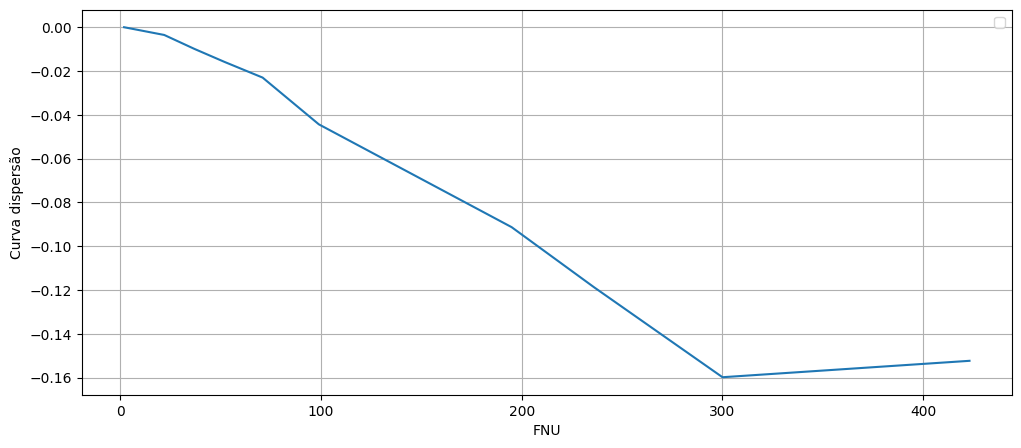

In [ ]:
plt.figure(figsize=(12, 5))  # Tamanho do gráfico
plt.plot(rotulos, new_feature_teste2[:,0])
plt.xlabel('FNU')
plt.ylabel('Curva dispersão')
plt.legend()
plt.grid(True)
plt.show()

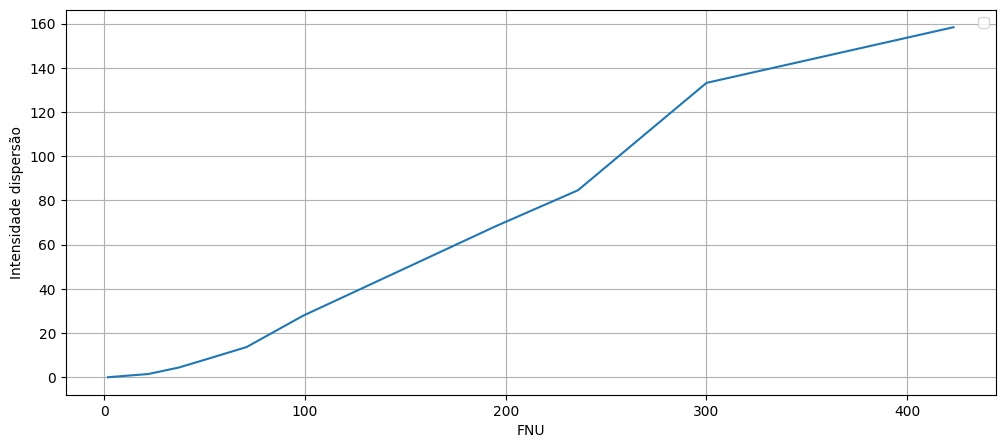

In [ ]:
plt.figure(figsize=(12, 5))  # Tamanho do gráfico
plt.plot(rotulos, new_feature_teste2[:,1])
plt.xlabel('FNU')
plt.ylabel('Intensidade dispersão')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Crie um modelo de regressão linear múltipla
modelo_final = LinearRegression()

# Treine o modelo com os dados de treinamento
modelo_final.fit(new_feature_teste2, rotulos)

# Calcular métricas de avaliação
previsoes = modelo_final.predict(new_feature_teste2)
msa_linear = mean_absolute_error(rotulos, previsoes)
mse_linear = mean_squared_error(rotulos, previsoes)
r2_linear = r2_score(rotulos, previsoes)


print("\nMétricas de Avaliação para Modelo Linear:")
print(f'MSA (Erro Médio Absoluto): {msa_linear}')
print(f'MSE (Erro Quadrático Médio): {mse_linear}')
print(f'R2 Score (Coeficiente de Determinação): {r2_linear}')


Métricas de Avaliação para Modelo Linear:
MSA (Erro Médio Absoluto): 14.459740853990734
MSE (Erro Quadrático Médio): 311.0470618754333
R2 Score (Coeficiente de Determinação): 0.9822821843344985
